# Load Data 

In [1]:
import os
import pandas as pd

def compute_accuracy_from_files(condition_path, keyword):
    """
    Read all text files in the given path with the specified keyword,
    and compute the accuracy for each file.
    """
    accuracies = []
    for filename in os.listdir(condition_path):
        if filename.endswith('.txt') and keyword in filename:
            file_path = os.path.join(condition_path, filename)
            df = pd.read_csv(file_path)
            # Compute accuracy as the proportion of correct guesses
            accuracy = df['Accuracy'].mean()
            # Save the accuracy and the filename
            accuracies.append({'Filename': filename, 'Accuracy': accuracy})
    return pd.DataFrame(accuracies)

# Define the path to your data directory
data_path = r'C:\Users\jdiaz\Desktop\DTU_ExperimentCognitiveScience\DTU_ExperimentCognitiveScience-main\DTU_ExperimentCognitiveScience-main\results'

# Compute accuracies for both conditions
pleasant_accuracies = compute_accuracy_from_files(data_path, "con1")
neutral_accuracies = compute_accuracy_from_files(data_path, "con0")

# Add condition labels
pleasant_accuracies['Condition'] = 'Pleasant'
neutral_accuracies['Condition'] = 'Neutral'

# Combine both conditions into a single DataFrame
all_accuracies = pd.concat([pleasant_accuracies, neutral_accuracies], ignore_index=True)

# Add confounding variables
all_accuracies['Mood'] = all_accuracies['Condition'].map({'Pleasant': 7.1, 'Neutral': 7.3})
all_accuracies['Fatigue'] = all_accuracies['Condition'].map({'Pleasant': 3.4, 'Neutral': 3.9})
all_accuracies['Sensitivity'] = all_accuracies['Condition'].map({'Pleasant': 4.9, 'Neutral': 5.3})

# Show the final DataFrame
print(all_accuracies)

                  Filename  Accuracy Condition  Mood  Fatigue  Sensitivity
0   results_ID_11_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
1   results_ID_13_con1.txt  0.916667  Pleasant   7.1      3.4          4.9
2   results_ID_15_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
3   results_ID_17_con1.txt  0.916667  Pleasant   7.1      3.4          4.9
4   results_ID_19_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
5   results_ID_21_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
6   results_ID_23_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
7   results_ID_25_con1.txt  0.861111  Pleasant   7.1      3.4          4.9
8   results_ID_27_con1.txt  0.777778  Pleasant   7.1      3.4          4.9
9   results_ID_29_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
10  results_ID_31_con1.txt  0.722222  Pleasant   7.1      3.4          4.9
11  results_ID_33_con1.txt  0.944444  Pleasant   7.1      3.4          4.9
12  results_ID_35_con1.tx

# Exploratory Data Analysis

Summary Statistics and Distribution of Accuracies across Groups

Summary Statistics:
        Accuracy       Mood    Fatigue  Sensitivity
count  30.000000  30.000000  30.000000    30.000000
mean    0.886111   7.213333   3.683333     5.126667
std     0.078686   0.100801   0.252003     0.201603
min     0.694444   7.100000   3.400000     4.900000
25%     0.861111   7.100000   3.400000     4.900000
50%     0.916667   7.300000   3.900000     5.300000
75%     0.944444   7.300000   3.900000     5.300000
max     1.000000   7.300000   3.900000     5.300000


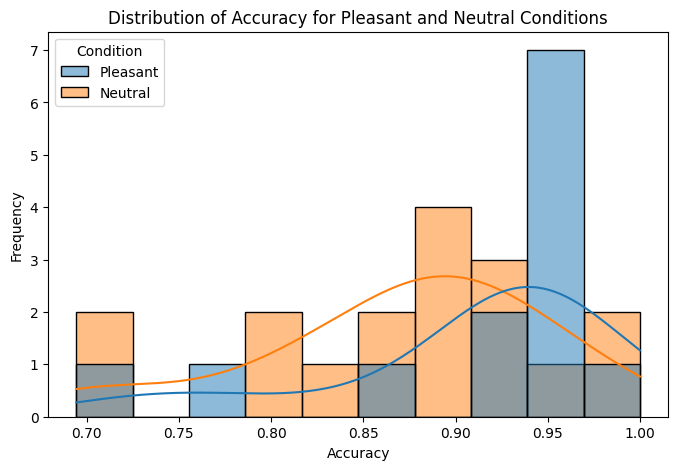

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate summary statistics
print("Summary Statistics:")
print(all_accuracies.describe())

# Distribution of Accuracy across Conditions
plt.figure(figsize=(8, 5))
sns.histplot(data=all_accuracies, x='Accuracy', hue='Condition', kde=True, bins=10)
plt.title('Distribution of Accuracy for Pleasant and Neutral Conditions')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


Assessment of Normality for the different Variables, use Shapiro-Wilk and Q-Q plots.

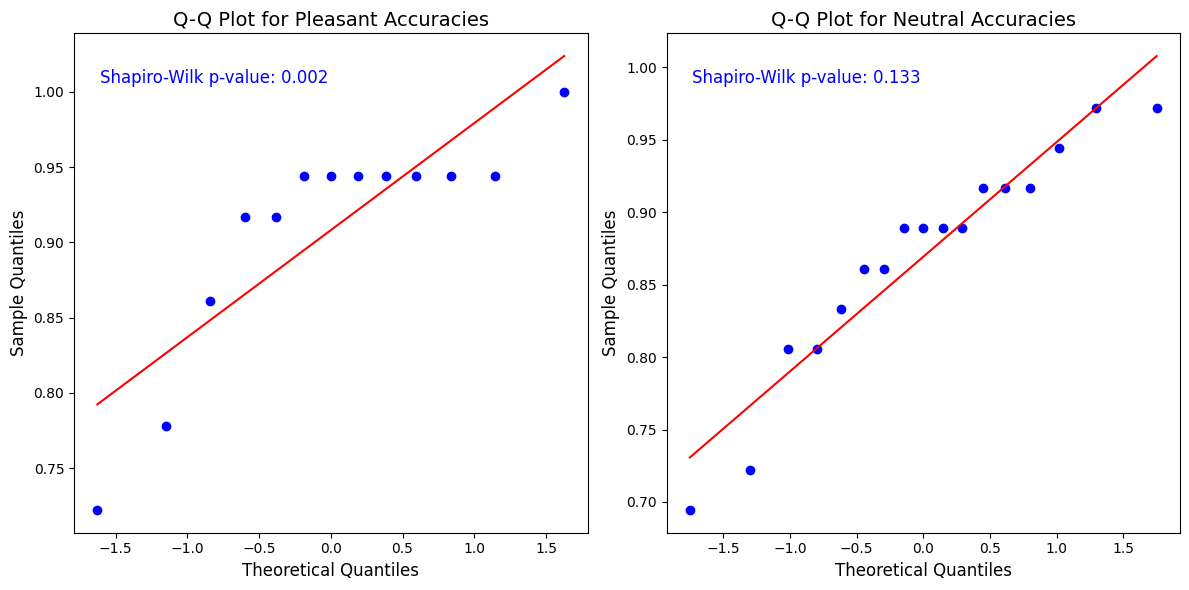

In [11]:
import scipy.stats as stats
import matplotlib.pyplot as plt


# Compute accuracies for both conditions
pleasant_accuracies = compute_accuracy_from_files(data_path, "con1")
neutral_accuracies = compute_accuracy_from_files(data_path, "con0")

# Perform Shapiro-Wilk test for both conditions
shapiro_pleasant = stats.shapiro(pleasant_accuracies['Accuracy'])
shapiro_neutral = stats.shapiro(neutral_accuracies['Accuracy'])

# Extract p-values for annotations
pleasant_pvalue = shapiro_pleasant.pvalue
neutral_pvalue = shapiro_neutral.pvalue

# Q-Q Plot for pleasant accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(pleasant_accuracies['Accuracy'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Pleasant Accuracies', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {pleasant_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

# Q-Q Plot for neutral accuracies
plt.subplot(1, 2, 2)
stats.probplot(neutral_accuracies['Accuracy'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Neutral Accuracies', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {neutral_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

plt.tight_layout()
plt.show()


# Preliminary Statistical Test 

In [12]:
from scipy.stats import ttest_ind, mannwhitneyu


# Mann-Whitney U test (non-parametric)
mann_whitney_result = mannwhitneyu(pleasant_accuracies['Accuracy'], neutral_accuracies['Accuracy'], alternative='greater')
print(f"Mann-Whitney U test result: {mann_whitney_result}")

Mann-Whitney U test result: MannwhitneyuResult(statistic=153.0, pvalue=0.03738107703334798)


# Final Statistical Analysis (Including Covariables)

1. Check Data Assumptions 
2. ANCOVA
3. Check Model Assumptions 
4. Post Hoc Test (if needed)


**1.** 

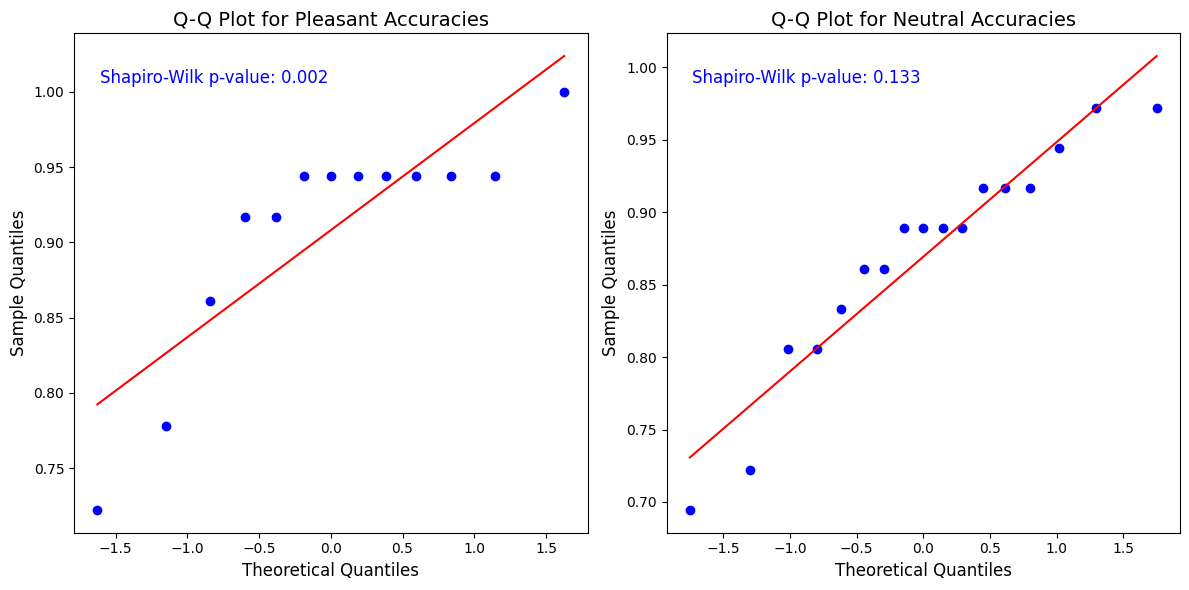

In [13]:
# Perform Shapiro-Wilk test for both conditions
shapiro_pleasant = stats.shapiro(pleasant_accuracies['Accuracy'])
shapiro_neutral = stats.shapiro(neutral_accuracies['Accuracy'])

# Extract p-values for annotations
pleasant_pvalue = shapiro_pleasant.pvalue
neutral_pvalue = shapiro_neutral.pvalue

# Q-Q Plot for pleasant accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(pleasant_accuracies['Accuracy'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Pleasant Accuracies', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {pleasant_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

# Q-Q Plot for neutral accuracies
plt.subplot(1, 2, 2)
stats.probplot(neutral_accuracies['Accuracy'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Neutral Accuracies', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {neutral_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

plt.tight_layout()
plt.show()

**For covariables**

In [20]:
pleasant = all_accuracies.loc[all_accuracies['Condition'] == 'Pleasant']
neutral = all_accuracies.loc[all_accuracies['Condition'] == 'Neutral']

Mood

C:\Users\jdiaz\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_morestats.py:1797: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


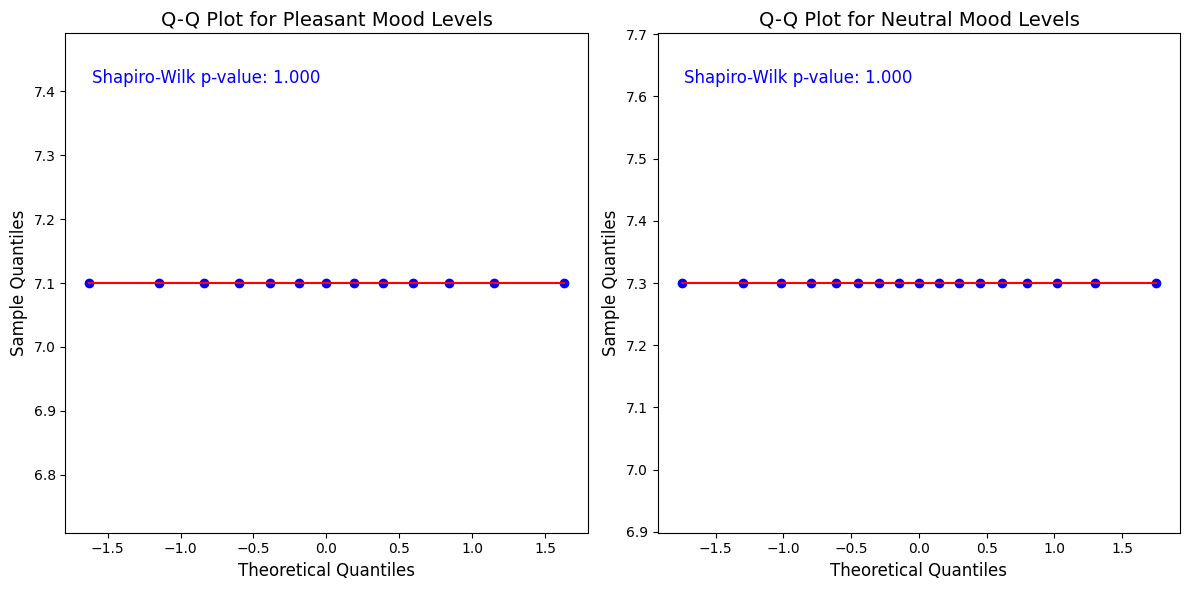

In [21]:
# Perform Shapiro-Wilk test for both conditions
shapiro_pleasant = stats.shapiro(pleasant['Mood'])
shapiro_neutral = stats.shapiro(neutral['Mood'])

# Extract p-values for annotations
pleasant_pvalue = shapiro_pleasant.pvalue
neutral_pvalue = shapiro_neutral.pvalue

# Q-Q Plot for pleasant accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(pleasant['Mood'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Pleasant Mood Levels', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {pleasant_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

# Q-Q Plot for neutral accuracies
plt.subplot(1, 2, 2)
stats.probplot(neutral['Mood'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Neutral Mood Levels', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {neutral_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

plt.tight_layout()
plt.show()

Fatigue 

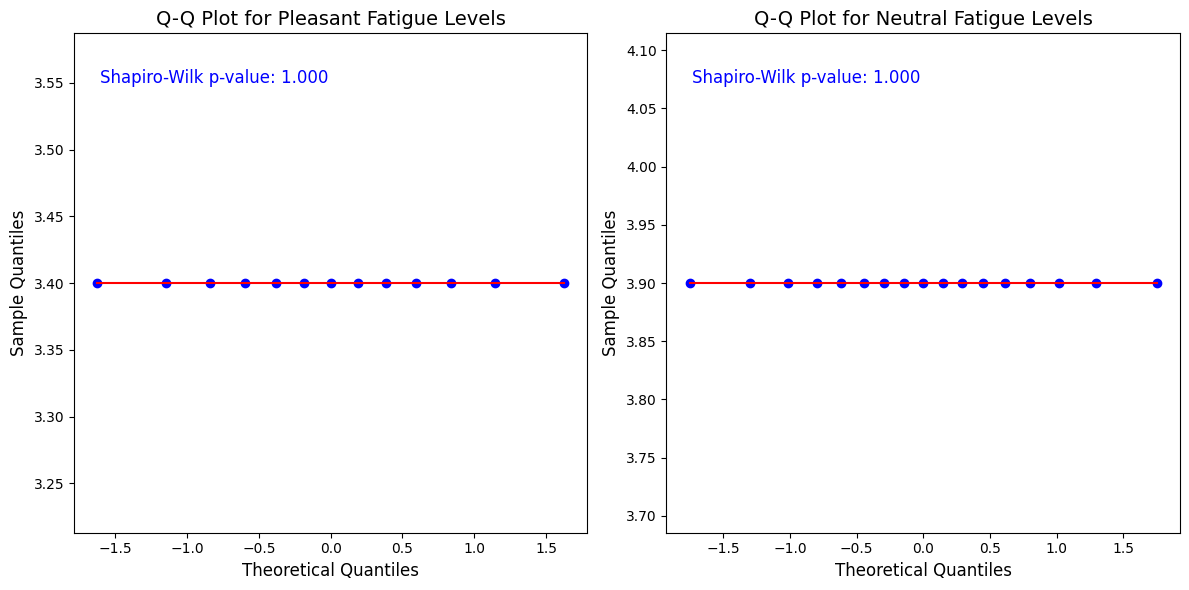

In [22]:
# Perform Shapiro-Wilk test for both conditions
shapiro_pleasant = stats.shapiro(pleasant['Fatigue'])
shapiro_neutral = stats.shapiro(neutral['Fatigue'])

# Extract p-values for annotations
pleasant_pvalue = shapiro_pleasant.pvalue
neutral_pvalue = shapiro_neutral.pvalue

# Q-Q Plot for pleasant accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(pleasant['Fatigue'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Pleasant Fatigue Levels', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {pleasant_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

# Q-Q Plot for neutral accuracies
plt.subplot(1, 2, 2)
stats.probplot(neutral['Fatigue'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Neutral Fatigue Levels', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {neutral_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

plt.tight_layout()
plt.show()

Olfactory Sensitivity 

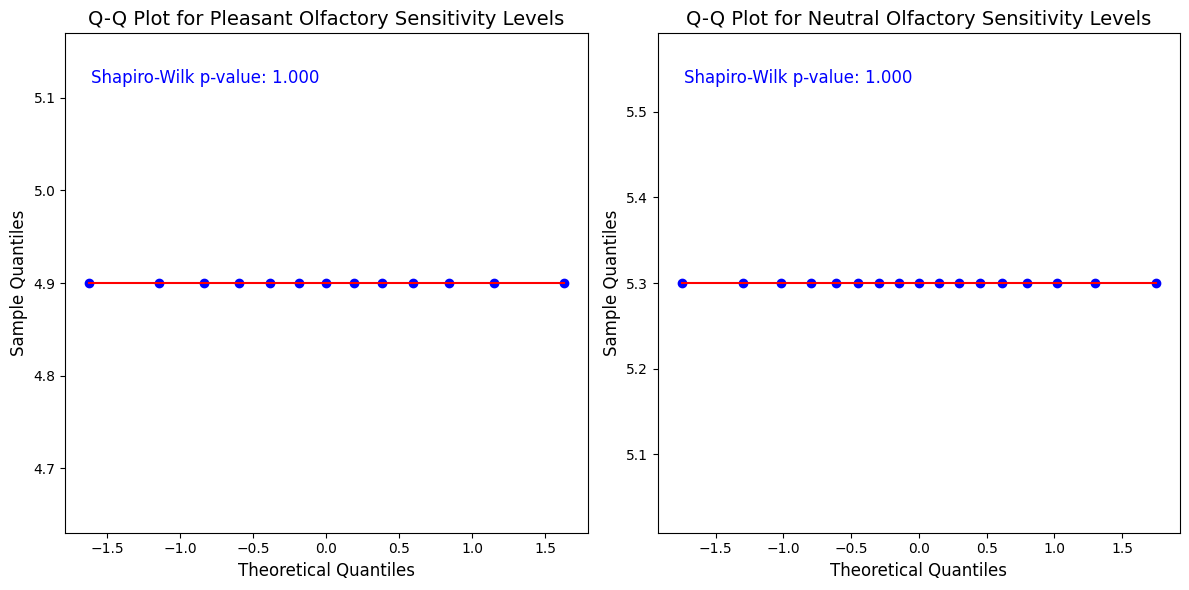

In [24]:
# Perform Shapiro-Wilk test for both conditions
shapiro_pleasant = stats.shapiro(pleasant['Sensitivity'])
shapiro_neutral = stats.shapiro(neutral['Sensitivity'])

# Extract p-values for annotations
pleasant_pvalue = shapiro_pleasant.pvalue
neutral_pvalue = shapiro_neutral.pvalue

# Q-Q Plot for pleasant accuracies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
stats.probplot(pleasant['Sensitivity'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Pleasant Olfactory Sensitivity Levels', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {pleasant_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

# Q-Q Plot for neutral accuracies
plt.subplot(1, 2, 2)
stats.probplot(neutral['Sensitivity'] , dist="norm", plot=plt)
plt.title('Q-Q Plot for Neutral Olfactory Sensitivity Levels', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=12)
plt.ylabel('Sample Quantiles', fontsize=12)
plt.annotate(
    f"Shapiro-Wilk p-value: {neutral_pvalue:.3f}", 
    xy=(0.05, 0.9), 
    xycoords='axes fraction', 
    fontsize=12, 
    color='blue'
)

plt.tight_layout()
plt.show()

**2.**

In [25]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Run ANCOVA
model = ols("Accuracy ~ Condition + Mood + Fatigue + Sensitivity", data=all_accuracies).fit()

# Print the summary of the model
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

               sum_sq    df           F        PR(>F)
Condition    0.060038   1.0    9.980214  3.775147e-03
Mood         1.995045   1.0  331.638239  4.666173e-17
Fatigue      0.019171   1.0    3.186821  8.507245e-02
Sensitivity  0.919206   1.0  152.800596  7.375982e-13
Residual     0.168440  28.0         NaN           NaN


**3.**

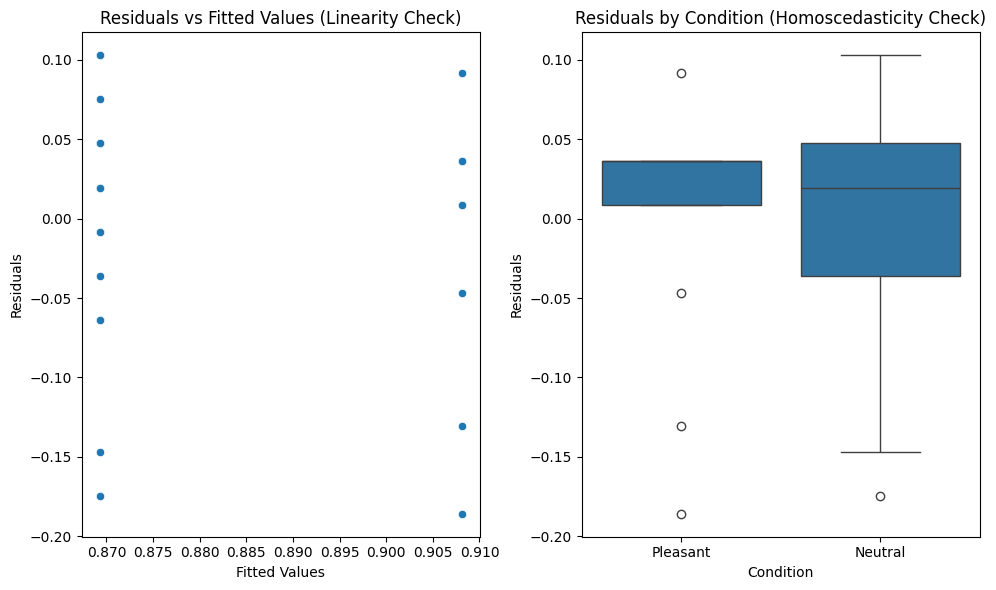

ANCOVA with Interaction Terms:
                             sum_sq    df             F        PR(>F)
Condition             -3.551695e-17   1.0 -5.904017e-15  1.000000e+00
Mood                   2.350686e+01   1.0  3.907569e+03  1.276551e-31
Condition:Mood         6.003823e-02   1.0  9.980214e+00  3.775147e-03
Fatigue                2.350686e+01   1.0  3.907569e+03  1.276551e-31
Condition:Fatigue      6.003823e-02   1.0  9.980214e+00  3.775147e-03
Sensitivity            2.350686e+01   1.0  3.907569e+03  1.276551e-31
Condition:Sensitivity  6.003823e-02   1.0  9.980214e+00  3.775147e-03
Residual               1.684403e-01  28.0           NaN           NaN


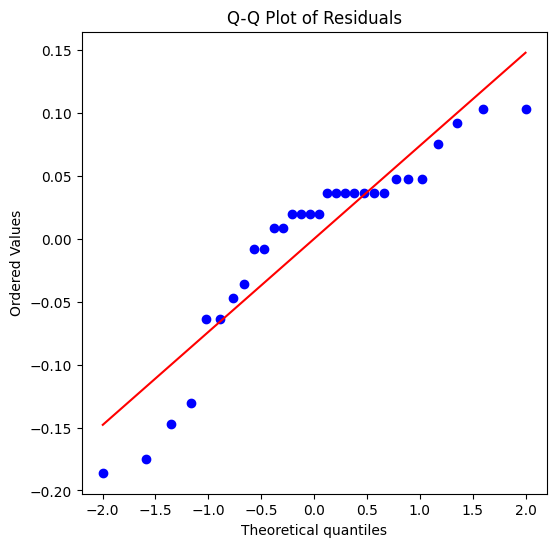

Shapiro-Wilk Test for Normality of Residuals:
Statistic: 0.8696, p-value: 0.0016


In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm

# Residuals from the ANCOVA model
residuals = model.resid
fitted_values = model.fittedvalues

# 1. Linearity - Plot residuals vs. fitted values
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values, y=residuals)
plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")

# 2. Homoscedasticity - Check for equal variance of residuals across groups
plt.subplot(1, 2, 2)
sns.boxplot(x=all_accuracies["Condition"], y=residuals)
plt.title("Residuals by Condition (Homoscedasticity Check)")
plt.xlabel("Condition")
plt.ylabel("Residuals")

plt.tight_layout()
plt.show()

# 3. Homogeneity of Regression Slopes - Add interaction terms and test
model_interactions = ols("Accuracy ~ Condition * (Mood + Fatigue + Sensitivity)", data=all_accuracies).fit()
anova_table_interactions = sm.stats.anova_lm(model_interactions, typ=2)
print("ANCOVA with Interaction Terms:")
print(anova_table_interactions)

# 4. Normality of residuals - Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.show()

# 5. Formal Normality Test (Shapiro-Wilk test)
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test for Normality of Residuals:")
print(f"Statistic: {shapiro_test.statistic:.4f}, p-value: {shapiro_test.pvalue:.4f}")

